In [1]:
import CM4Xutils

In [2]:
grid = CM4Xutils.load_wmt_grid(
    "CM4Xp125",
    interval=str(1750),
    dmget=True
)

Loading CM4Xp125-piControl-spinup for interval `1750`.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Skipping variable average_DT because `cell_methods` attribute not defined.
Skipping variable average_T1 because `cell_methods` attribute not defined.
Skipping variable average_T2 because `cell_methods` attribute not defined.
Skipping variable time_bnds because `cell_methods` attribute not defined.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Overriding CM4Xp125 grid coordinates from supergrid.
Regridding ice
Skipping variable average_DT because `cell_methods` attribute not defined.
Skipping variable average_T1 because `cell_methods` attribute not defined.
Skipping variable average_T2 because `cell_methods` attribute not defined.
Skipping variable time_bnds because `cell_methods` attribute not defined.
Inferring Z

In [8]:
ds = CM4Xutils.load_density(CM4Xutils.exp_dict["CM4Xp125"]["piControl-spinup"], time="0001*")

Issuing dmget command to migrate data to disk. Migration complete.


In [48]:
corrected_wet_mask = (ds['thkcello'].isel(time=0).fillna(0.)!=0.).compute()
corrected_wet_mask.attrs["cell_methods"] = "time:mean xh:mean yh:mean z_l:sum"

In [49]:
import xgcm
g = xgcm.Grid(
    ds,
    coords={"X":{"center":"xh", "outer":"xq"}, "Y":{"center":"yh", "outer":"yq"}},
    boundary={"X":"periodic", "Y":"extend"},
    metrics={('X', 'Y'):['areacello']},
    autoparse_metadata=False
)

In [52]:
import xarray as xr
ds_wet_mask = CM4Xutils.coarsen.horizontally_coarsen(
    xr.Dataset({'corrected_wet_mask': corrected_wet_mask}).assign_coords(ds.coords),
    g,
    dim={"X":2, "Y":2}
).fillna(0.)

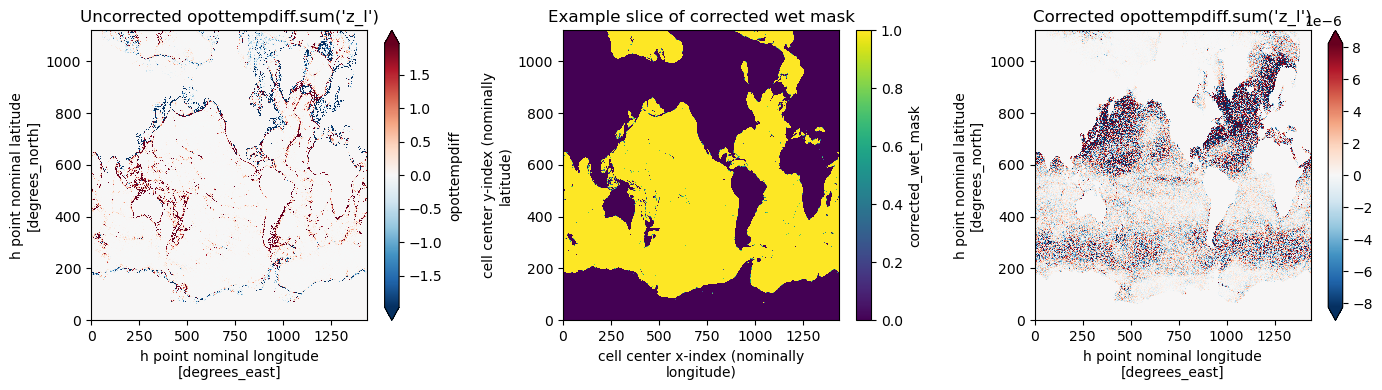

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
(grid._ds['opottempdiff'].isel(exp=0, time=0)).sum("z_l").plot(robust=True)
plt.title("Uncorrected opottempdiff.sum('z_l')")
plt.subplot(1,3,2)
ds_wet_mask.corrected_wet_mask.isel(z_l=20).plot()
plt.title("Example slice of corrected wet mask")
plt.subplot(1,3,3)
(grid._ds['opottempdiff'].isel(exp=0, time=0) * ds_wet_mask.corrected_wet_mask).sum("z_l").plot(robust=True)
plt.title("Corrected opottempdiff.sum('z_l')");
plt.tight_layout()

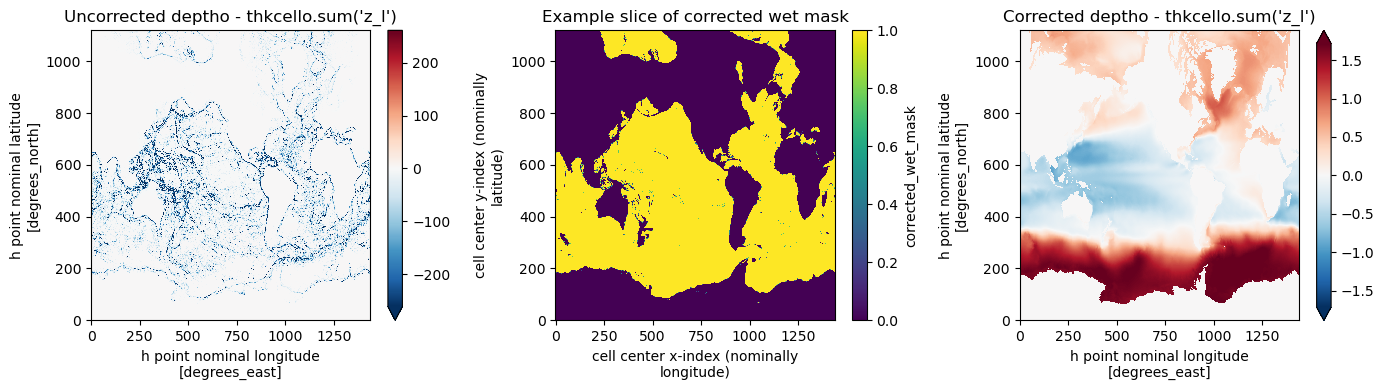

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
(grid._ds.deptho - grid._ds['thkcello'].isel(exp=0, time=0).sum("z_l")).plot(robust=True)
plt.title("Uncorrected deptho - thkcello.sum('z_l')")
plt.subplot(1,3,2)
ds_wet_mask.corrected_wet_mask.isel(z_l=20).plot()
plt.title("Example slice of corrected wet mask")
plt.subplot(1,3,3)
(grid._ds.deptho - (grid._ds['thkcello'].isel(exp=0, time=0)*ds_wet_mask.corrected_wet_mask).sum("z_l")).plot(robust=True)
plt.title("Corrected deptho - thkcello.sum('z_l')");
plt.tight_layout()

NameError: name 'ds_wet_mask' is not defined